In [97]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load Iris Dataset

In [2]:
iris = datasets.load_iris()

In [3]:
# We only use 2 features of the IRIS dataset
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))
print('Number of classes:', len(np.unique(y)))

Class labels: [0 1 2]
Number of classes: 3


In [4]:
label_to_name = {
    0: 'Iris-setosa', 
    1: 'Iris-versicolor',
    2: 'Iris-verginica',
}

# Data preprocessing

In [5]:
# Splitting dataset into train (70% = 105 samples) and test (30% = 45 samples) samples
from sklearn.model_selection import train_test_split

In [6]:
# train_test_split shuffles the training set internally
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=1,
                                                    stratify=y)

In [7]:
# Stratification means that the train_test_split method returns training
# and test subsets that have the same proportions of class labels as the input dataset.
print('Labels counts in y', np.bincount(y))
print('Labels counts in y_train', np.bincount(y_train))
print('Labels counts in y_test', np.bincount(y_test))

Labels counts in y [50 50 50]
Labels counts in y_train [35 35 35]
Labels counts in y_test [15 15 15]


In [8]:
# Features scaling for gradient descent
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()
sc.fit(X_train)
# Zscore the data
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
print('training input data [mean={:.3f}, std={:.3f}]'.format(np.mean(X_train_std),
                                                             np.std(X_test_std)))

training input data [mean=0.000, std=0.960]


# Training Perceptron Model

In [10]:
from sklearn.linear_model import Perceptron

In [11]:
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty=None, random_state=1,
      shuffle=True, tol=None, verbose=0, warm_start=False)

# Predict and Assess

In [12]:
y_pred = ppn.predict(X_test_std)
misclassification_rate = np.sum(y_test != y_pred) / len(y_test)
print('Misclassified samples: {:.2f}%'.format(100 * misclassification_rate))

Misclassified samples: 6.67%


In [13]:
from sklearn.metrics import accuracy_score

In [14]:
ppn.score(X_test_std, y_test)

0.93333333333333335

In [27]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')
    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')

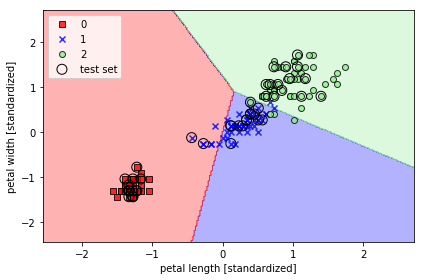

In [91]:
# Create single X and y 
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
                      y=y_combined, 
                      classifier=ppn,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Logistic Regression

In [34]:
from single_layer_perceptron import LogisticRegression as LR

In [18]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

In [83]:
lrc = LR(learning_rate=0.01,  n_iter=1000)

In [84]:
lrc.fit(X_train_01_subset, y_train_01_subset)

100%|██████████| 1000/1000 [00:00<00:00, 20819.33it/s]

Training <single_layer_perceptron.LogisticRegression object at 0x7f9ab49ab358>
Training completed


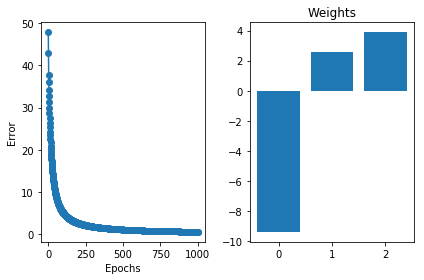

[-9.36800869  2.55599087  3.88116267]


In [85]:
lrc.plot()
print(lrc.weights)

In [86]:
from sklearn.linear_model import LogisticRegression

In [46]:
lr = LogisticRegression(C=100.0, random_state=1, fit_intercept=True)

In [87]:
lr.fit(X_combined_std, y_combined)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [88]:
np.hstack((lr.coef_.ravel(), lr.intercept_))

array([-5.67138829, -5.04268112,  2.74449763, -2.34602763,  8.31534845,
        7.02793092, -6.47714635, -0.71434673, -9.1684092 ])

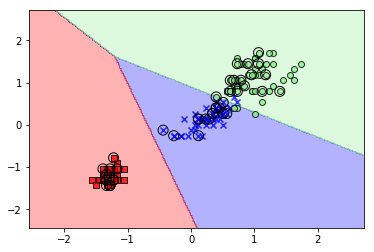

In [90]:
plot_decision_regions(X=X_combined_std, 
                      y=y_combined, 
                      classifier=lr,
                      test_idx=range(105, 150))

In [105]:
lr.predict_proba(X_test_std[:3, ]).argmax(axis=1)

array([2, 0, 0])

In [111]:
pd.DataFrame(data=lr.predict_proba(X_test_std[:3, ]),
             columns=list(label_to_name.values()),
            ).max(axis=1)

0    0.860057
1    0.841684
2    0.858129
dtype: float64

In [92]:
lr.score(X_test_std, y_test)

0.97777777777777775

In [114]:
X_test_std[0, :].reshape(1, -1)

array([[ 0.89820289,  1.44465434]])